In [ ]:
def j_invariant(phi):
    """
    Compute j(τ(φ)) = j(τ(φ,φ,φ))
    
    Parameters:
    -----------
    phi : float or complex
        The parameter φ
    
    Returns:
    --------
    float or complex
        The j-invariant value
    """
    numerator = (3*phi - 1)**3 * (3*phi**3 - 3*phi**2 + 9*phi - 1)**3
    denominator = phi**6 * (phi - 1)**3 * (9*phi - 1)
    
    return numerator / denominator

In [ ]:
j_invariant(15/2)

64096528489320601/13313408062500

In [1]:
def elliptic_curve_from_phi(phi):
    """
    Compute the Weierstrass coefficients (a, b) for the elliptic curve:
    y² = x³ + ax + b
    
    where the coefficients are given in terms of φ by equation (70):
    a = -(9φ⁴ - 12φ³ + 30φ² - 12φ + 1) / 3
    b = -2(27φ⁶ - 54φ⁵ - 135φ⁴ + 180φ³ - 99φ² + 18φ - 1) / 27
    
    Parameters:
    -----------
    phi : numeric (int, float, or symbolic)
        The parameter φ
    
    Returns:
    --------
    tuple : (a, b)
        The two Weierstrass coefficients
    """
    # Compute coefficient a
    a_numerator = 9*phi**4 - 12*phi**3 + 30*phi**2 - 12*phi + 1
    a = -a_numerator / 3
    
    # Compute coefficient b
    b_numerator = 27*phi**6 - 54*phi**5 - 135*phi**4 + 180*phi**3 - 99*phi**2 + 18*phi - 1
    b = -2 * b_numerator / 27
    
    return a, b

# def Ef_from_phi(phi):
#     """
#     Returns the coefficients (a, b) of the elliptic curve:
#     y^2 = x^3 + ax + b
    
#     as a function of phi (φ).
    
#     Parameters:
#     -----------
#     phi : float or complex
#         The parameter φ
    
#     Returns:
#     --------
#     tuple : (a, b)
#         The coefficients of the elliptic curve
#     """
#     # Common term that appears in both coefficients
#     denominator = (3 * phi**2 + 6 * phi - 1)**2
#     common_term = 144 * phi**3 / denominator
    
#     # Coefficient of x
#     a = common_term - 3
    
#     # Constant term
#     b = common_term - 2
    
#     return a, b

# SageMath version (if using Sage)
def elliptic_curve_from_phi_sage(phi):
    """
    SageMath version that returns an actual EllipticCurve object.
    
    Parameters:
    -----------
    phi : numeric or symbolic
        The parameter φ
    
    Returns:
    --------
    EllipticCurve : Sage EllipticCurve object
    """
    from sage.all import EllipticCurve, QQ
    
    a, b = elliptic_curve_from_phi(phi)
    
    # Create elliptic curve in Weierstrass form [0, 0, 0, a, b]
    return EllipticCurve([0, 0, 0, a, b])

In [ ]:
from tqdm import tqdm

P = Primes()
n = 0

print("Checking that isogenous curves have the same first 100 a_p coefficients...")
for i in tqdm(range(100), desc = "Comparing a_p coeffs: "):
    if EllipticCurve("108570ct4").q_eigenform(P[100])[P[i]] != elliptic_curve_from_phi_sage(1/385).q_eigenform(P[100])[P[i]]:
        print("Isogenous curves do not have the same a_p coefficients!")
        n += 1
        break
if n == 0:
    print("Checked.")

Checking that isogenous curves have the same first 100 a_p coefficients...


Comparing a_p coeffs: 100%|███████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 11.48it/s]

Checked.


In [ ]:
from sage.databases.cremona import CremonaDatabase

phi = 21/49
ctest = elliptic_curve_from_phi_sage(phi)
ctest.label()

'420c2'

In [2]:
import numpy as np

#Let's generate a new set of rational elliptic curves associated to the HV manifold
Nphi = 20000

phis = np.random.randint(1, 100, size = (Nphi))/np.random.randint(1, 100, size = (Nphi))
phis = [QQ(x) for x in phis]

In [3]:
save(phis, "HV_curves/my_phis")

In [2]:
phis = load("HV_curves/my_phis")

In [ ]:
from tqdm import tqdm

# Load curves from phis, excluding the ones with uncertain rank
rk0_curves = []
rk1_curves = []
rk2_curves = []
ranks = []

for phi in tqdm(phis, desc = "Loading curves from phis: "):
    try:
        curve = elliptic_curve_from_phi_sage(phi)
        rk = curve.rank()
        if rk not in ranks:
            ranks.append(rk)
        if rk == 0:
            rk0_curves.append(curve)
        elif rk == 1:
            rk1_curves.append(curve)
        elif rk == 2:
            rk2_curves.append(curve)
    except (ArithmeticError, RuntimeError, LookupError, SignalError):
        continue

print(f"Number of curves of rank 0, 1, 2 in database: {len(rk0_curves)}, {len(rk1_curves)}, {len(rk2_curves)}")
print(f"Ranks: {ranks}")

Loading curves from phis:   0%|          | 0/20000 [00:00<?, ?it/s]

Loading curves from phis:   0%|          | 9/20000 [00:00<09:46, 34.11it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   0%|          | 84/20000 [00:00<01:37, 205.09it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   1%|          | 107/20000 [00:00<02:11, 151.48it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   1%|          | 124/20000 [00:00<02:51, 115.60it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   1%|          | 150/20000 [00:01<02:53, 114.11it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.
Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.
Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   1%|          | 162/20000 [00:01<04:31, 73.04it/s] 

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.
Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   1%|          | 218/20000 [00:02<04:24, 74.79it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   1%|          | 229/20000 [00:02<04:52, 67.66it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   1%|          | 238/20000 [00:03<05:22, 61.23it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   1%|▏         | 256/20000 [00:03<04:58, 66.25it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   1%|▏         | 281/20000 [00:03<04:13, 77.78it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.
Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   2%|▏         | 321/20000 [00:03<03:51, 84.99it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   2%|▏         | 355/20000 [00:04<03:19, 98.56it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   2%|▏         | 457/20000 [00:04<01:39, 197.18it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   2%|▏         | 493/20000 [00:04<01:45, 185.58it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   3%|▎         | 513/20000 [00:04<02:03, 157.23it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   3%|▎         | 560/20000 [00:05<02:08, 151.25it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   3%|▎         | 584/20000 [00:05<02:25, 133.81it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   3%|▎         | 652/20000 [00:10<24:44, 13.04it/s] 

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   3%|▎         | 654/20000 [00:11<31:07, 10.36it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   3%|▎         | 666/20000 [00:11<25:32, 12.62it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   4%|▍         | 870/20000 [00:24<16:19, 19.54it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   5%|▍         | 910/20000 [00:26<21:05, 15.09it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   5%|▍         | 938/20000 [00:28<27:46, 11.44it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   5%|▍         | 951/20000 [00:29<29:42, 10.68it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   5%|▍         | 955/20000 [00:30<36:32,  8.69it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   5%|▍         | 971/20000 [00:31<32:20,  9.81it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   5%|▌         | 1055/20000 [00:36<20:05, 15.71it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   5%|▌         | 1064/20000 [00:37<20:24, 15.47it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   6%|▌         | 1115/20000 [00:40<21:32, 14.61it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   6%|▌         | 1168/20000 [00:43<20:33, 15.27it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   6%|▌         | 1188/20000 [00:45<22:46, 13.77it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   6%|▌         | 1198/20000 [00:46<25:26, 12.32it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   6%|▌         | 1210/20000 [00:46<19:50, 15.78it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   6%|▋         | 1289/20000 [00:51<20:23, 15.29it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   7%|▋         | 1301/20000 [00:52<28:21, 10.99it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   7%|▋         | 1309/20000 [00:53<23:02, 13.52it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   7%|▋         | 1410/20000 [00:59<20:03, 15.45it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   7%|▋         | 1442/20000 [01:01<23:36, 13.10it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   7%|▋         | 1477/20000 [01:04<25:51, 11.94it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   8%|▊         | 1517/20000 [01:06<30:34, 10.08it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   8%|▊         | 1554/20000 [01:08<23:58, 12.83it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   8%|▊         | 1568/20000 [01:09<16:46, 18.31it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   8%|▊         | 1571/20000 [01:09<21:12, 14.48it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   8%|▊         | 1578/20000 [01:10<24:44, 12.41it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   8%|▊         | 1593/20000 [01:11<23:24, 13.11it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   8%|▊         | 1696/20000 [01:18<35:09,  8.68it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   9%|▊         | 1709/20000 [01:19<18:22, 16.59it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   9%|▊         | 1725/20000 [01:20<13:37, 22.35it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   9%|▊         | 1731/20000 [01:21<21:25, 14.21it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   9%|▊         | 1741/20000 [01:21<17:53, 17.01it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   9%|▉         | 1753/20000 [01:22<24:19, 12.50it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   9%|▉         | 1866/20000 [01:28<13:51, 21.81it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:   9%|▉         | 1887/20000 [01:29<17:59, 16.78it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  10%|▉         | 1920/20000 [01:31<20:56, 14.39it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  10%|▉         | 1942/20000 [01:33<21:38, 13.91it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  10%|█         | 2071/20000 [01:41<24:15, 12.32it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  11%|█         | 2138/20000 [01:44<13:26, 22.16it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  11%|█         | 2166/20000 [01:46<21:56, 13.55it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  11%|█         | 2170/20000 [01:46<23:35, 12.60it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  11%|█         | 2176/20000 [01:47<34:29,  8.61it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  11%|█         | 2184/20000 [01:48<26:44, 11.10it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  11%|█         | 2189/20000 [01:49<32:43,  9.07it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  11%|█         | 2191/20000 [01:49<33:47,  8.78it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  11%|█         | 2198/20000 [01:49<26:02, 11.40it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  11%|█▏        | 2255/20000 [01:53<21:39, 13.66it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  12%|█▏        | 2318/20000 [01:56<19:16, 15.28it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  12%|█▏        | 2322/20000 [01:56<25:50, 11.40it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  12%|█▏        | 2335/20000 [01:57<26:44, 11.01it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  12%|█▏        | 2390/20000 [02:01<20:21, 14.42it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  12%|█▏        | 2450/20000 [02:03<12:06, 24.15it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  12%|█▏        | 2495/20000 [02:06<26:01, 11.21it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  13%|█▎        | 2501/20000 [02:06<20:46, 14.04it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  13%|█▎        | 2547/20000 [02:09<20:28, 14.21it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  13%|█▎        | 2603/20000 [02:12<23:01, 12.59it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  14%|█▍        | 2755/20000 [02:19<13:36, 21.12it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  14%|█▍        | 2758/20000 [02:19<18:39, 15.40it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  14%|█▍        | 2761/20000 [02:20<21:40, 13.25it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  14%|█▍        | 2767/20000 [02:20<25:17, 11.36it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  14%|█▍        | 2865/20000 [02:25<21:36, 13.22it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  15%|█▍        | 2917/20000 [02:28<25:35, 11.13it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  15%|█▍        | 2949/20000 [02:30<09:57, 28.53it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  15%|█▍        | 2970/20000 [02:31<20:29, 13.85it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  15%|█▍        | 2985/20000 [02:32<14:51, 19.09it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  15%|█▌        | 3081/20000 [02:37<21:19, 13.22it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  15%|█▌        | 3088/20000 [02:38<19:04, 14.78it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  16%|█▌        | 3215/20000 [02:43<15:39, 17.87it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  16%|█▌        | 3226/20000 [02:43<14:43, 18.98it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  17%|█▋        | 3320/20000 [02:47<13:15, 20.97it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  17%|█▋        | 3364/20000 [02:50<11:19, 24.50it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  17%|█▋        | 3477/20000 [02:55<14:41, 18.74it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  18%|█▊        | 3616/20000 [03:00<12:53, 21.19it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  18%|█▊        | 3628/20000 [03:00<16:37, 16.42it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  18%|█▊        | 3632/20000 [03:01<19:23, 14.07it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  19%|█▉        | 3787/20000 [03:07<11:46, 22.94it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  19%|█▉        | 3845/20000 [03:09<10:41, 25.17it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  20%|█▉        | 3983/20000 [03:16<18:08, 14.72it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  20%|██        | 4067/20000 [03:20<08:13, 32.29it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  21%|██        | 4117/20000 [03:22<20:17, 13.04it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  21%|██        | 4154/20000 [03:25<17:13, 15.34it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  21%|██        | 4207/20000 [03:27<09:28, 27.77it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  21%|██        | 4210/20000 [03:27<14:12, 18.51it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  21%|██        | 4245/20000 [03:29<10:17, 25.53it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  21%|██▏       | 4260/20000 [03:30<12:45, 20.56it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  21%|██▏       | 4267/20000 [03:30<21:51, 12.00it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  21%|██▏       | 4288/20000 [03:31<10:37, 24.66it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  22%|██▏       | 4341/20000 [03:34<13:24, 19.46it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  22%|██▏       | 4409/20000 [03:36<13:01, 19.96it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  22%|██▏       | 4412/20000 [03:37<16:46, 15.49it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  22%|██▏       | 4436/20000 [03:38<16:24, 15.82it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  22%|██▏       | 4459/20000 [03:39<12:35, 20.57it/s]

Unable to compute the rank with certainty (lower bound=0).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  22%|██▏       | 4462/20000 [03:39<20:47, 12.45it/s]

Unable to compute the rank with certainty (lower bound=1).
This could be because Sha(E/Q)[2] is nontrivial.
Try calling something like two_descent(second_limit=13) on the
curve then trying this command again.  You could also try rank
with only_use_mwrank=False.


Loading curves from phis:  22%|██▏       | 4467/20000 [03:39<15:38, 16.55it/s]

In [ ]:
save(rk0_curves, "HV_curves/my_HV_rk0_curves")
save(rk1_curves, "HV_curves/my_HV_rk1_curves")
save(rk2_curves, "HV_curves/my_HV_rk2_curves")
save(rank, "HV_curves/my_ranks")

In [ ]:
rk0_curves = load("HV_curves/my_HV_rk0_curves")
rk1_curves = load("HV_curves/my_HV_rk2_curves")
rk2_curves = load("HV_curves/my_HV_rk2_curves")
ranks = load("HV_curves/my_ranks")

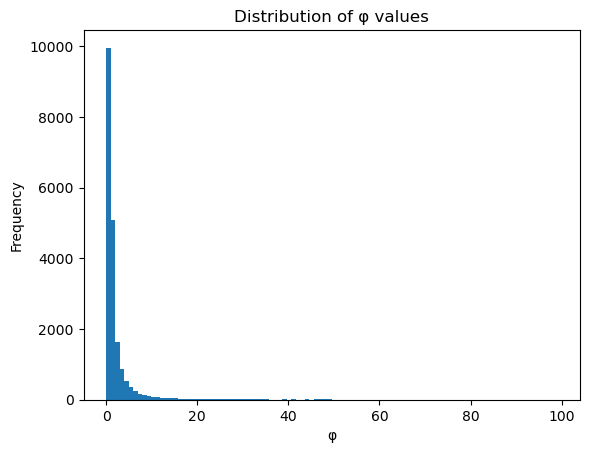

In [ ]:
import matplotlib.pyplot as plt

# Convert Sage rationals to floats for plotting
phis_float = [float(phi) for phi in phis]

plt.hist(phis_float, bins=100)
plt.xlabel('φ')
plt.ylabel('Frequency')
plt.title('Distribution of φ values')
plt.show()

In [ ]:
rk0_curves = []
rk1_curves = []
rk2_curves = []

for E in curves:
    rk = E.rank()
    if rk == 0:
        rk0_curves.append(E)
    elif rk == 1:
        rk1_curves.append(E)
    elif rk == 2:
        rk2_curves.append(E)
        
print(f"Number of curves of rank 0, 1, 2: {len(rk0_curves)}, {len(rk1_curves)}, {len(rk2_curves)}")

SignalError: Segmentation fault

In [ ]:
from tqdm import tqdm

def get_isogeny_class_representatives(cs):
    """Extract one representative from each isogeny class"""
    seen_classes = []
    representatives = []
    
    for E in tqdm(cs, desc = "Extracting isogeny class reps: "):
        iso_class = E.isogeny_class()
        if iso_class not in seen_classes:
            representatives.append(E)
            seen_classes.append(iso_class)
    
    return representatives
    
# Apply to all three groups
print("Obtaining the isogeny class representatives for rank zero curves...")
rk0_isogeny_reps = get_isogeny_class_representatives(rk0_curves)
print("Done.")
print("Obtaining the isogeny class representatives for rank one curves...")
rk1_isogeny_reps = get_isogeny_class_representatives(rk1_curves)
print("Done.")
print("Obtaining the isogeny class representatives for rank two curves...")
rk2_isogeny_reps = get_isogeny_class_representatives(rk2_curves)
print("Done.")

print(f"Number of representatives of curves of rank 0, 1, 2: {len(rk0_isogeny_reps)}, {len(rk1_isogeny_reps)}, {len(rk2_isogeny_reps)}")

Obtaining the isogeny class representatives for rank zero curves...


Extracting isogeny class reps:   0%|                                                           | 0/8864 [00:00<?, ?it/s]

In [ ]:
save(rk0_isogeny_reps, "HV_curves/my_HV_rk0_isogeny_reps")
save(rk1_isogeny_reps, "HV_curves/my_HV_rk1_isogeny_reps")
save(rk2_isogeny_reps, "HV_curves/my_HV_rk2_isogeny_reps")

In [ ]:
rk0_isogeny_reps = load("HV_curves/my_HV_rk0_isogeny_reps")
rk1_isogeny_reps = load("HV_curves/my_HV_rk1_isogeny_reps")
rk2_isogeny_reps = load("HV_curves/my_HV_rk2_isogeny_reps")

In [ ]:
import numpy as np
from tqdm import tqdm
# Import the list of primes
P = Primes()

# Extract the average aps
N = 1000 # Number of primes I want to plot

print("Computing eigenforms...")

rk0_eigenforms = []
rk1_eigenforms = []
rk2_eigenforms = []

for E in tqdm(rk0_isogeny_reps, desc = "Computing rk0 eigenforms: "):
    rk0_eigenforms.append(E.q_eigenform(P[N]))

for E in tqdm(rk1_isogeny_reps, desc = "Computing rk1 eigenforms: "):
    rk1_eigenforms.append(E.q_eigenform(P[N]))

for E in tqdm(rk2_isogeny_reps, desc = "Computing rk2 eigenforms: "):
    rk2_eigenforms.append(E.q_eigenform(P[N]))

print("Done.")
print("Computing the average a_p's...")

rk0_aps = np.array([np.mean([ef[P[i]] for ef in rk0_eigenforms]) for i in range(N)])
rk1_aps = np.array([np.mean([ef[P[i]] for ef in rk1_eigenforms]) for i in range(N)])
rk2_aps = np.array([np.mean([ef[P[i]] for ef in rk2_eigenforms]) for i in range(N)])

print("Done.")

Computing eigenforms...


Computing rk2 eigenforms: 100%|███████████████████████████████████████████████████████| 358/358 [00:05<00:00, 68.33it/s]


Done.
Computing the average a_p's...
Done.


In [ ]:
# save(rk0_eigenforms, "HV_curves/my_rk0_eigenforms")
# save(rk1_eigenforms, "HV_curves/my_rk1_eigenforms")
# save(rk2_eigenforms, "HV_curves/my_rk2_eigenforms")
save(rk0_aps, "HV_curves/my_rk0_aps")
save(rk1_aps, "HV_curves/my_rk1_aps")
save(rk2_aps, "HV_curves/my_rk2_aps")

In [ ]:
# rk0_eigenforms = load("HV_curves/my_rk0_eigenforms")
# rk1_eigenforms = load("HV_curves/my_rk1_eigenforms")
# rk2_eigenforms = load("HV_curves/my_rk2_eigenforms")
rk0_aps = load("HV_curves/my_rk0_aps")
rk1_aps = load("HV_curves/my_rk1_aps")
rk2_aps = load("HV_curves/my_rk2_aps")
N = 1000

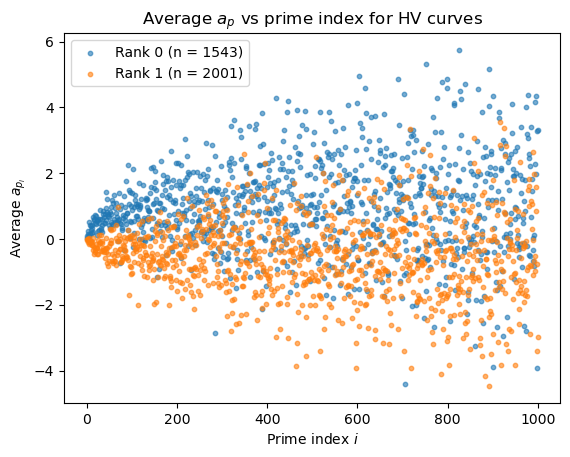

In [ ]:
import matplotlib.pyplot as plt
N = 1000
plt.scatter(range(N), rk0_aps[:N], label=f"Rank 0 (n = {len(rk0_isogeny_reps)})", alpha=0.6, s=10)
plt.scatter(range(N), rk1_aps[:N], label=f"Rank 1 (n = {len(rk1_isogeny_reps)})", alpha=0.6, s=10)
# plt.scatter(range(N), rk2_aps[:N], label="Rank 2", alpha=0.6, s=10)
plt.legend()
plt.xlabel(r"Prime index $i$")
plt.ylabel(r"Average $a_{p_i}$")
plt.title(r"Average $a_p$ vs prime index for HV curves")
plt.savefig(f"HV_curves/my_HV_aps_allconductors.png", dpi=150)
plt.show()